In [25]:
# 2.2 Submission for Sasha Morrison

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data

# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

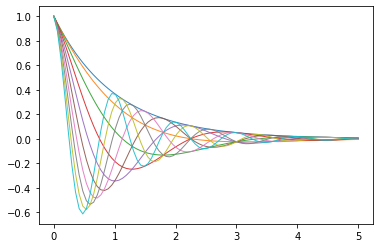

In [26]:
f = lambda x, y : np.cos((np.pi * y * x)) * (np.exp(-x))

theta = np.linspace(0, 2, 10)
fig, ax = plt.subplots()

for e in theta:
    # x will be an array of 
    # values between 0,5
    # of whatever length desired
    # higher length, higher res
    x = np.linspace(0, 5, 85)
    # y will be an array of the results 
    # for f(x, e) where e is every val
    # in np.linspace(0, 2, 10)
    y = f(x, e)
    ax.plot(x, y, linewidth=1, alpha=0.9)
plt.show()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ratio of `double faults` that Federer did over his `total points total` in a match

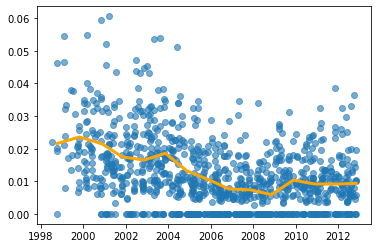

In [27]:
fig, ax = plt.subplots(1, 1)
data_url = r'data/tennis.csv'
df = pd.read_csv(data_url)
df['fault_ratep1'] = df['player1 double faults'] / df['player1 total points total']
df[['year', 'start date']]

ax.scatter(pd.to_datetime(df['start date']), df['fault_ratep1'], alpha=0.6)
ax.plot_date(
            pd.to_datetime(df.groupby('year')['start date'].max()), 
            df.groupby('year')['fault_ratep1'].mean(), 
            "-", linewidth=3, color='orange'
            )

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [28]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

In [29]:
ticker = read_data(ticker_list)
t_data = ticker
df = t_data.pct_change()

res = []
for e in df.columns:
    res.append(df[e].sum())

(<BarContainer object of 13 artists>,
       sum pct change
 PTR        -0.167309
 BA          0.047864
 BHP         0.157450
 IBM         0.172500
 KO          0.179819
 TM          0.198610
 AMZN        0.208725
 GOOG        0.274568
 INTC        0.276715
 SNE         0.370920
 MSFT        0.464471
 QCOM        0.505284
 AAPL        0.655497)

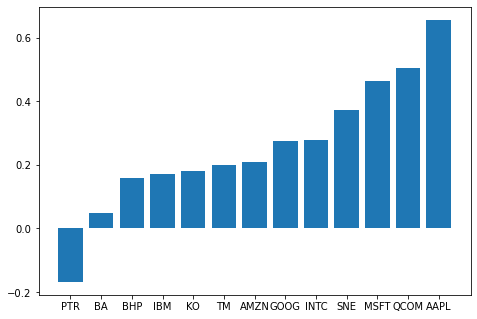

In [31]:
df2 = pd.DataFrame(res, index=df.columns)
df2.columns = ['sum pct change']
df2 = df2.sort_values('sum pct change')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(df2.index, df2['sum pct change']), df2

In [7]:
# These numbers differ from the original

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [35]:
def read_data(ticker_list,
          start=dt.datetime(1970, 1, 1),
          end=dt.datetime(2020, 11, 30)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

indices = read_data(indices_list)
indices = indices.dropna()
ind_pct = indices[['^GSPC', '^IXIC', '^DJI', '^N225']].pct_change()
ind_pct['year'] = indices.index.year


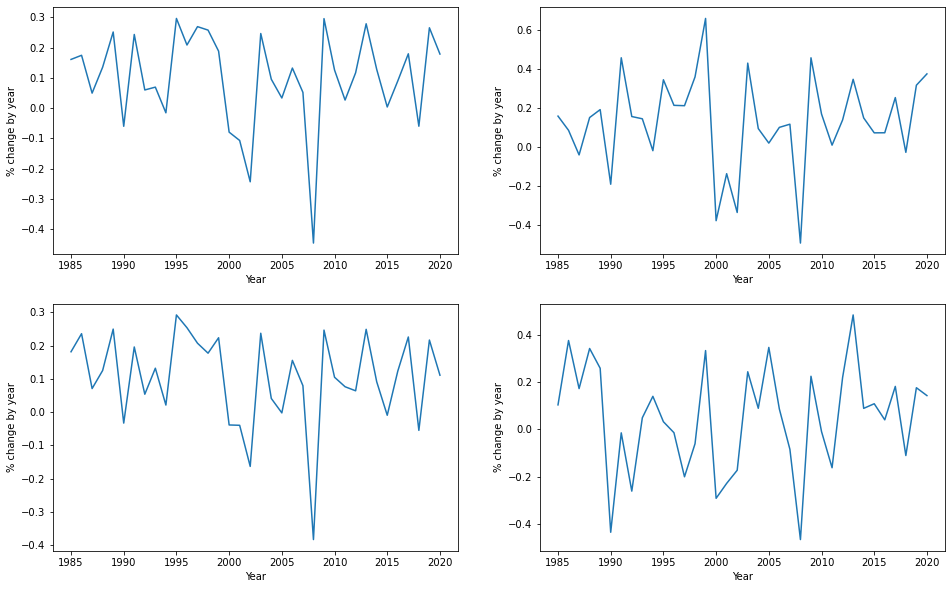

In [37]:
ydata = ind_pct.groupby('year').sum()
fig, ax = plt.subplots(2, 2, figsize=(16,10))
for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel('Year')
        ax[i][j].set_ylabel('% change by year')
ax[0][0].plot(ydata['^GSPC']) # s&p
ax[0][1].plot(ydata['^IXIC']) # nasdaq
ax[1][0].plot(ydata['^DJI']) # dow
ax[1][1].plot(ydata['^N225']) # nikkei


# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

<ipython-input-16-11168e6beec7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start date'] = pd.to_datetime(df['start date'])
<ipython-input-16-11168e6beec7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fault rate'] = df['fault rate'].fillna(0)


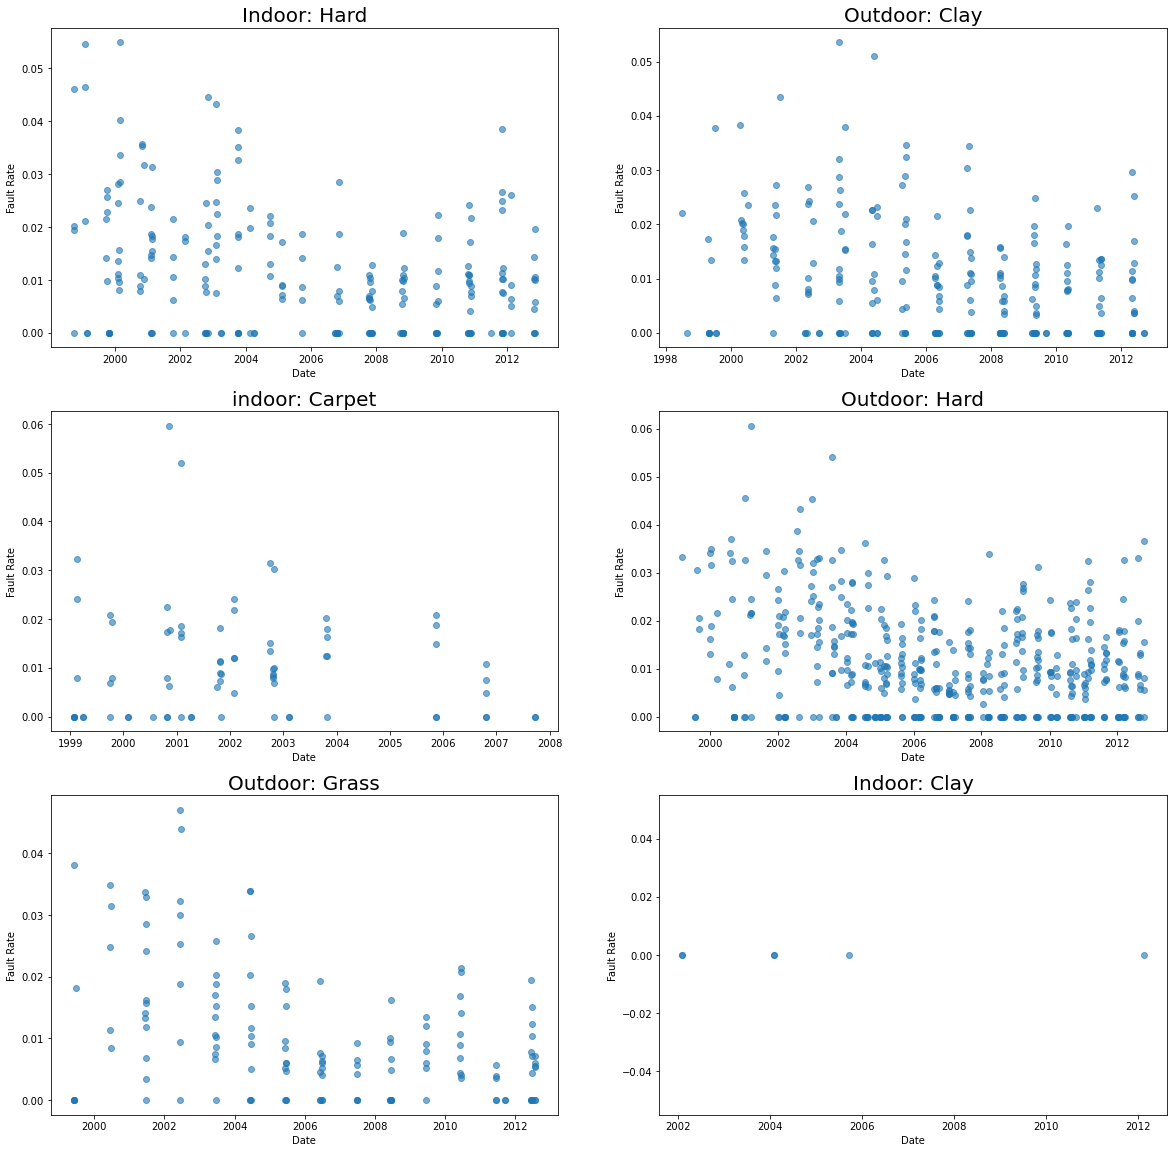

In [16]:
data_url = r'data/tennis.csv'
data = pd.read_csv(data_url)
df = data
df['fault rate'] = df['player1 double faults'] / df['player1 total points total']
df = df[['start date', 'year', 'fault rate', 'surface']]
df['start date'] = pd.to_datetime(df['start date'])
df['fault rate'] = df['fault rate'].fillna(0)

surf_list = df.surface.unique()
out = list()
fig, axes = plt.subplots(3,2, figsize=(20,20))
for e in surf_list:
    out.append(df.loc[ df['surface'] == e ])

axes[0,0].scatter(out[0]['start date'], out[0]['fault rate'], alpha=0.6)
axes[0,0].set_title('Indoor: Hard', fontsize=20)
axes[0,1].scatter(out[1]['start date'], out[1]['fault rate'], alpha=0.6)
axes[0,1].set_title('Outdoor: Clay', fontsize=20)
axes[1,0].scatter(out[2]['start date'], out[2]['fault rate'], alpha=0.6)
axes[1,0].set_title('indoor: Carpet', fontsize=20)
axes[1,1].scatter(out[3]['start date'], out[3]['fault rate'], alpha=0.6)
axes[1,1].set_title('Outdoor: Hard', fontsize=20)
axes[2,0].scatter(out[4]['start date'], out[4]['fault rate'], alpha=0.6)
axes[2,0].set_title('Outdoor: Grass', fontsize=20)
axes[2,1].scatter(out[5]['start date'], out[5]['fault rate'], alpha=0.6)
axes[2,1].set_title('Indoor: Clay', fontsize=20)

for i in range(3):
    for j in range(2):
        axes[i][j].set_xlabel('Date')
        axes[i][j].set_ylabel('Fault Rate')